## Setup

In [1]:
# Importing the main libraries
import numpy as np
import pandas as pd

# Notebook settings
%matplotlib inline

# Importing data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Data visualization settings
sns.set_style("darkgrid")

## Datasets Overview

In [2]:
# Loading the datasets
analyst = pd.read_csv('data/data-analyst.csv')
engineer = pd.read_csv('data/data-engineer.csv')
scientist = pd.read_csv('data/data-scientist.csv')

In [3]:
# Checking data analyst dataset variables
analyst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   jobId                346 non-null    int64  
 1   employerId           346 non-null    int64  
 2   employerName         346 non-null    object 
 3   employerProfileId    0 non-null      float64
 4   employerProfileName  0 non-null      float64
 5   jobTitle             346 non-null    object 
 6   locationName         346 non-null    object 
 7   minimumSalary        265 non-null    float64
 8   maximumSalary        265 non-null    float64
 9   currency             265 non-null    object 
 10  expirationDate       346 non-null    object 
 11  date                 346 non-null    object 
 12  jobDescription       346 non-null    object 
 13  applications         346 non-null    int64  
 14  jobUrl               346 non-null    object 
 15  fullDescription      346 non-null    obj

In [4]:
# Viewing sample of the data analyst dataset
analyst.head()

jobId  employerId        employerName  employerProfileId  \
0  41585234      626228  Aggregator Network                NaN   
1  41560037      626228  Aggregator Network                NaN   
2  41558134      626228  Aggregator Network                NaN   
3  41557531      626228  Aggregator Network                NaN   
4  41557524      626228  Aggregator Network                NaN   

   employerProfileName                                           jobTitle  \
0                  NaN                       Analyst, Client Data Analyst   
1                  NaN  Data Analyst / Business Analyst - Indices / Po...   
2                  NaN  Business Data Analyst - Reference Data Platfor...   
3                  NaN                              Graduate Data Analyst   
4                  NaN     Credit/Data Analyst - CONTRACT IMMEDIATE START   

       locationName  minimumSalary  maximumSalary currency expirationDate  \
0            London            NaN            NaN      NaN     26/01/2021   
1            London            NaN            NaN      NaN     23/01/2021   
2            London            NaN            NaN      NaN     23/01/2021   
3  Northern Ireland            NaN            NaN      NaN     23/01/2021   
4            London            NaN            NaN      NaN     23/01/2021   

         date                                     jobDescription  \
0  15/12/2020  MAIN PURPOSE OF THE ROLE Within Client Managem...   
1  12/12/2020  As a Data Analyst / Business Analyst you will ...   
2  12/12/2020  The solution will be a combination of on an in...   
3  12/12/2020  AECOM is built to deliver a better world. We d...   
4  12/12/2020  My client is a top-tier asset manager looking ...   

   applications                                             jobUrl  \
0            11  https://www.reed.co.uk/jobs/analyst-client-dat...   
1             7  https://www.reed.co.uk/jobs/data-analyst-busin...   
2             4  https://www.reed.co.uk/jobs/business-data-anal...   
3            20  https://www.reed.co.uk/jobs/graduate-data-anal...   
4            24  https://www.reed.co.uk/jobs/credit-data-analys...   

                                     fullDescription  
0  <strong>MAIN PURPOSE OF THE ROLE </strong><br ...  
1  As a Data Analyst / Business Analyst you will ...  
2  The solution will be a combination of on an in...  
3  AECOM is built to deliver a better world. We d...  
4  My client is a top-tier asset manager looking ...

## Exploratory Data Analysis

For this analysis we will investigate the following aspects:

1. Job postings by role (analyst, engineer or scientist) and location
2. Salary comparison by role
3. What is expected in general from a data professional

Obs.: Bear in mind that the data was extracted from an unique platform (Reed Employment) and contains openings from roughly August/2020 to Mid-January/2021.

In [5]:
# First we will create a 'role' column for each dataset
analyst['role'] = 'Data Analyst'
engineer['role'] = 'Data Engineer'
scientist['role'] = 'Data Scientist'

In [6]:
# Now, we will merge the datasets into a new one called 'df'
df = pd.concat([analyst, engineer, scientist], ignore_index=True)
df.head()

jobId  employerId        employerName  employerProfileId  \
0  41585234      626228  Aggregator Network                NaN   
1  41560037      626228  Aggregator Network                NaN   
2  41558134      626228  Aggregator Network                NaN   
3  41557531      626228  Aggregator Network                NaN   
4  41557524      626228  Aggregator Network                NaN   

   employerProfileName                                           jobTitle  \
0                  NaN                       Analyst, Client Data Analyst   
1                  NaN  Data Analyst / Business Analyst - Indices / Po...   
2                  NaN  Business Data Analyst - Reference Data Platfor...   
3                  NaN                              Graduate Data Analyst   
4                  NaN     Credit/Data Analyst - CONTRACT IMMEDIATE START   

       locationName  minimumSalary  maximumSalary currency expirationDate  \
0            London            NaN            NaN      NaN     26/01/2021   
1            London            NaN            NaN      NaN     23/01/2021   
2            London            NaN            NaN      NaN     23/01/2021   
3  Northern Ireland            NaN            NaN      NaN     23/01/2021   
4            London            NaN            NaN      NaN     23/01/2021   

         date                                     jobDescription  \
0  15/12/2020  MAIN PURPOSE OF THE ROLE Within Client Managem...   
1  12/12/2020  As a Data Analyst / Business Analyst you will ...   
2  12/12/2020  The solution will be a combination of on an in...   
3  12/12/2020  AECOM is built to deliver a better world. We d...   
4  12/12/2020  My client is a top-tier asset manager looking ...   

   applications                                             jobUrl  \
0            11  https://www.reed.co.uk/jobs/analyst-client-dat...   
1             7  https://www.reed.co.uk/jobs/data-analyst-busin...   
2             4  https://www.reed.co.uk/jobs/business-data-anal...   
3            20  https://www.reed.co.uk/jobs/graduate-data-anal...   
4            24  https://www.reed.co.uk/jobs/credit-data-analys...   

                                     fullDescription          role  
0  <strong>MAIN PURPOSE OF THE ROLE </strong><br ...  Data Analyst  
1  As a Data Analyst / Business Analyst you will ...  Data Analyst  
2  The solution will be a combination of on an in...  Data Analyst  
3  AECOM is built to deliver a better world. We d...  Data Analyst  
4  My client is a top-tier asset manager looking ...  Data Analyst

Text(0, 0.5, 'Number of Job Postings')

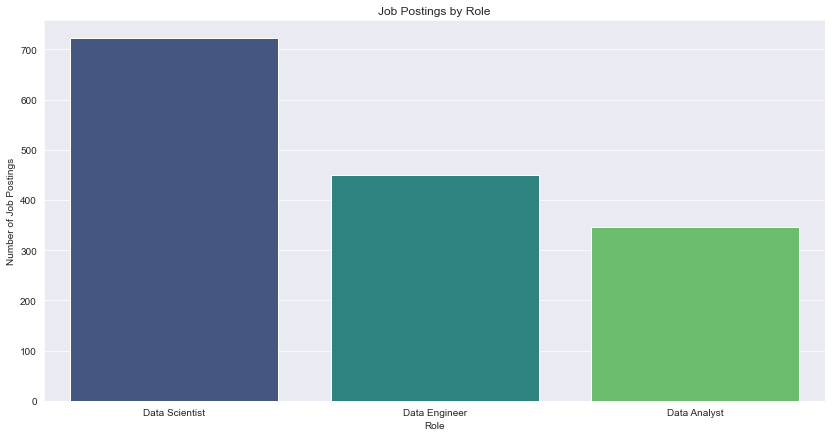

In [7]:
# Now let's see the number of job posting by role
plt.figure(figsize=(14,7))

sns.countplot(x="role", data=df, palette='viridis', order=df['role'].value_counts().index)

plt.title('Job Postings by Role')
plt.xlabel('Role')
plt.ylabel('Number of Job Postings')

We can see in the plot above that the majority of openings are for data scientists (~50%), followed by data engineers and data analysts.

In [8]:
# Top 10 locations with more job postings
df['locationName'].value_counts().head(10)

London                 796
Manchester              91
Leeds                   36
Milton Keynes           35
Reading                 30
Newcastle Upon Tyne     22
Oxford                  20
Bristol                 18
Nottingham              16
Edinburgh               16
Name: locationName, dtype: int64

Analysing the locations of the job openings, we can see that the vast majority are in London, followed by Manchester and Leeds in the North West of England.

Text(11.392373511904772, 0.5, 'Number of Job Postings')

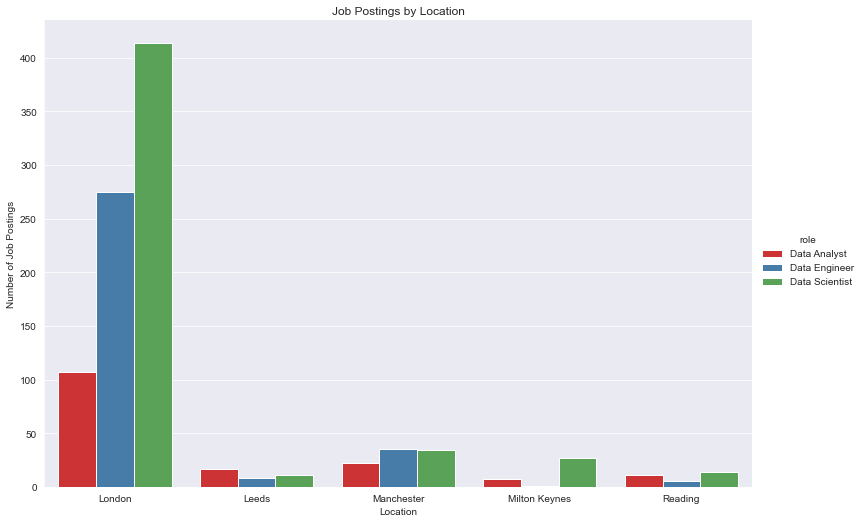

In [9]:
# Now let's see the proportion of each role in the five cities with more job postings
sns.catplot(x='locationName',
            kind='count',
            hue='role',
            height=7,
            aspect=1.5,
            palette='Set1',
            data=df[df['locationName'].isin(['London','Manchester','Leeds','Milton Keynes','Reading'])]
           )

plt.title('Job Postings by Location')
plt.xlabel('Location')
plt.ylabel('Number of Job Postings')

Looking at the plot above we can see that while London has more data science job postings, Leeds seeks more data analysts.

Text(0, 0.5, 'Salary')

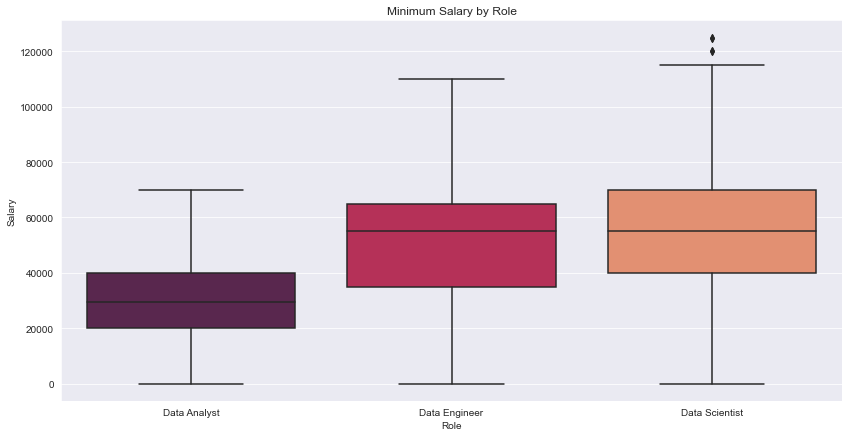

In [10]:
# Now let's take a look how the salaries vary by role
# For this analysis, we will use the minimum salary info
plt.figure(figsize=(14,7))

sns.boxplot(x="role", y="minimumSalary", palette='rocket', data=df)

plt.title('Minimum Salary by Role')
plt.xlabel('Role')
plt.ylabel('Salary')

Regarding the salaries offered, while a data engineer and a data scientist median salary is roughly the same (around £55000), a data scientist salary still tends to be higher. In comparison, a data analyst median salary was found to be significantly lower (~£30000).

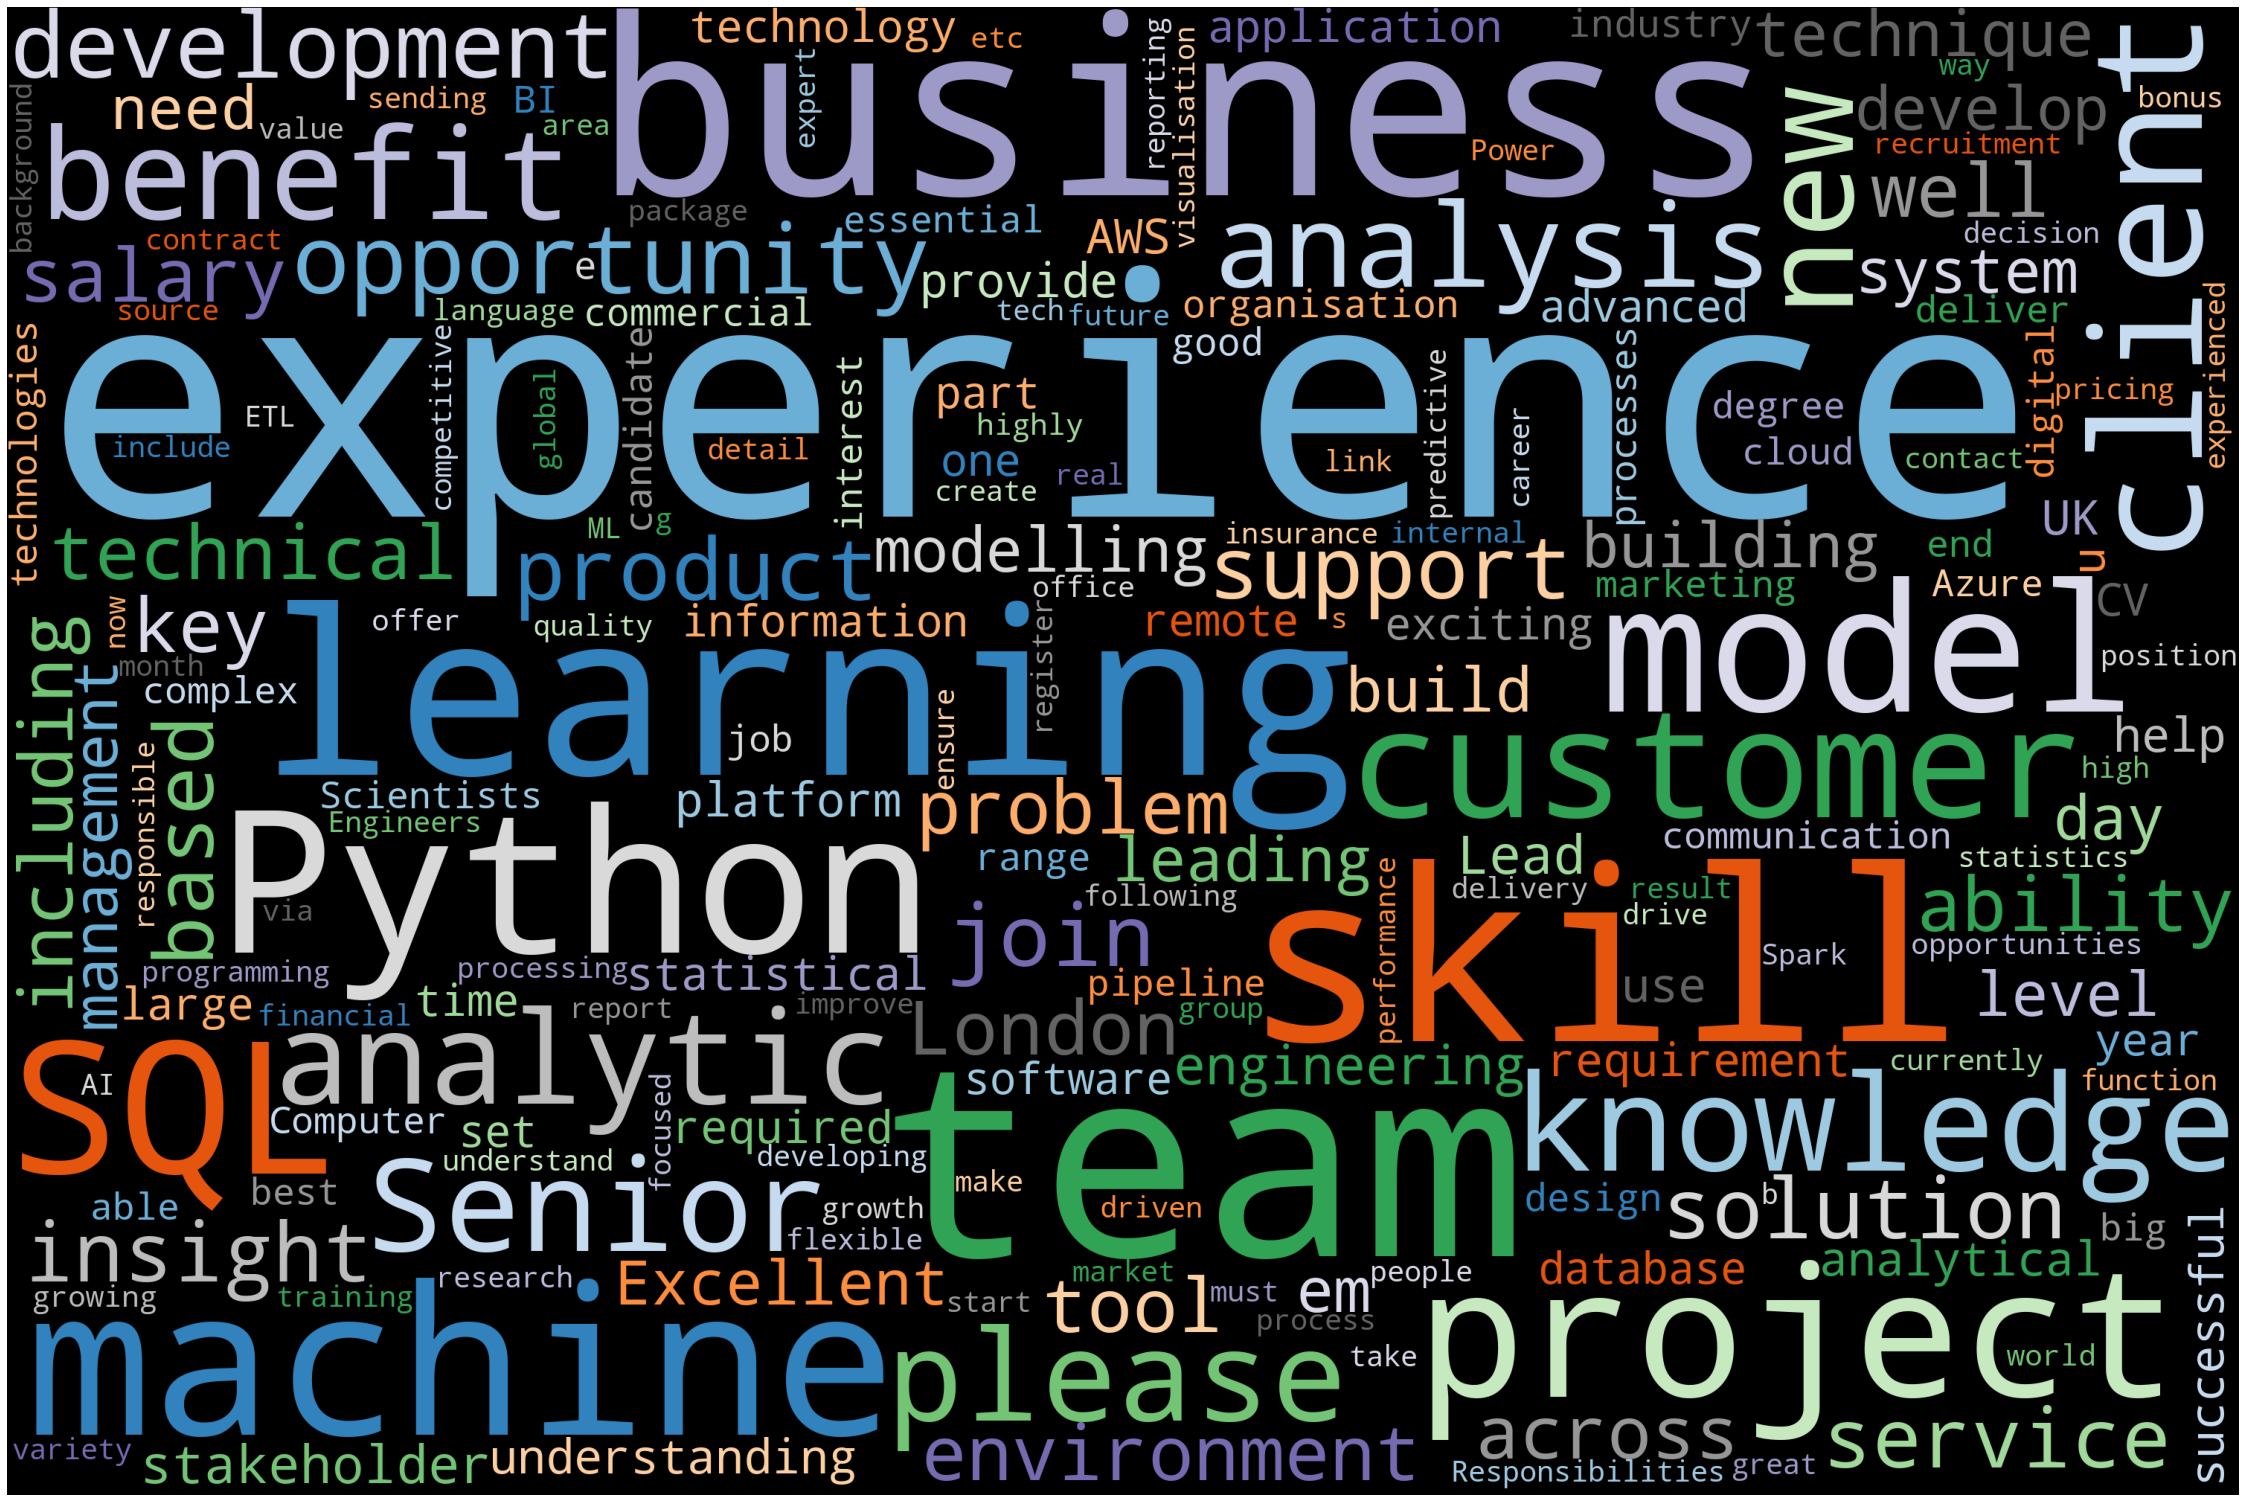

In [21]:
# Now let's explore the most common words/skills in the job description - fullDescription - column
# We will use this tutorial for this purpose: https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
    
# Import package
from wordcloud import WordCloud, STOPWORDS

# Adding more words as stopwords

STOPWORDS.update(['ul','li','br','p','strong','nbsp','amp','scientist','analyst', 'looking', 'company',
                  'engineer','data','will', 'science', 'work','working','using','role','apply','within'])

# Text
text = ' '.join(df['fullDescription'].tolist())

# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, 
                      background_color='black', colormap='tab20c', collocations=False, 
                      stopwords = STOPWORDS, max_words=200).generate(text)

# Plot
plot_cloud(wordcloud)

From the word cloud above, we can derive some insights about what is expected from a data professional:

1. Experience
2. Business knowledge/understanding
3. Teamwork
4. Skills such as python, SQL, machine learning and modelling
5. Project management skills

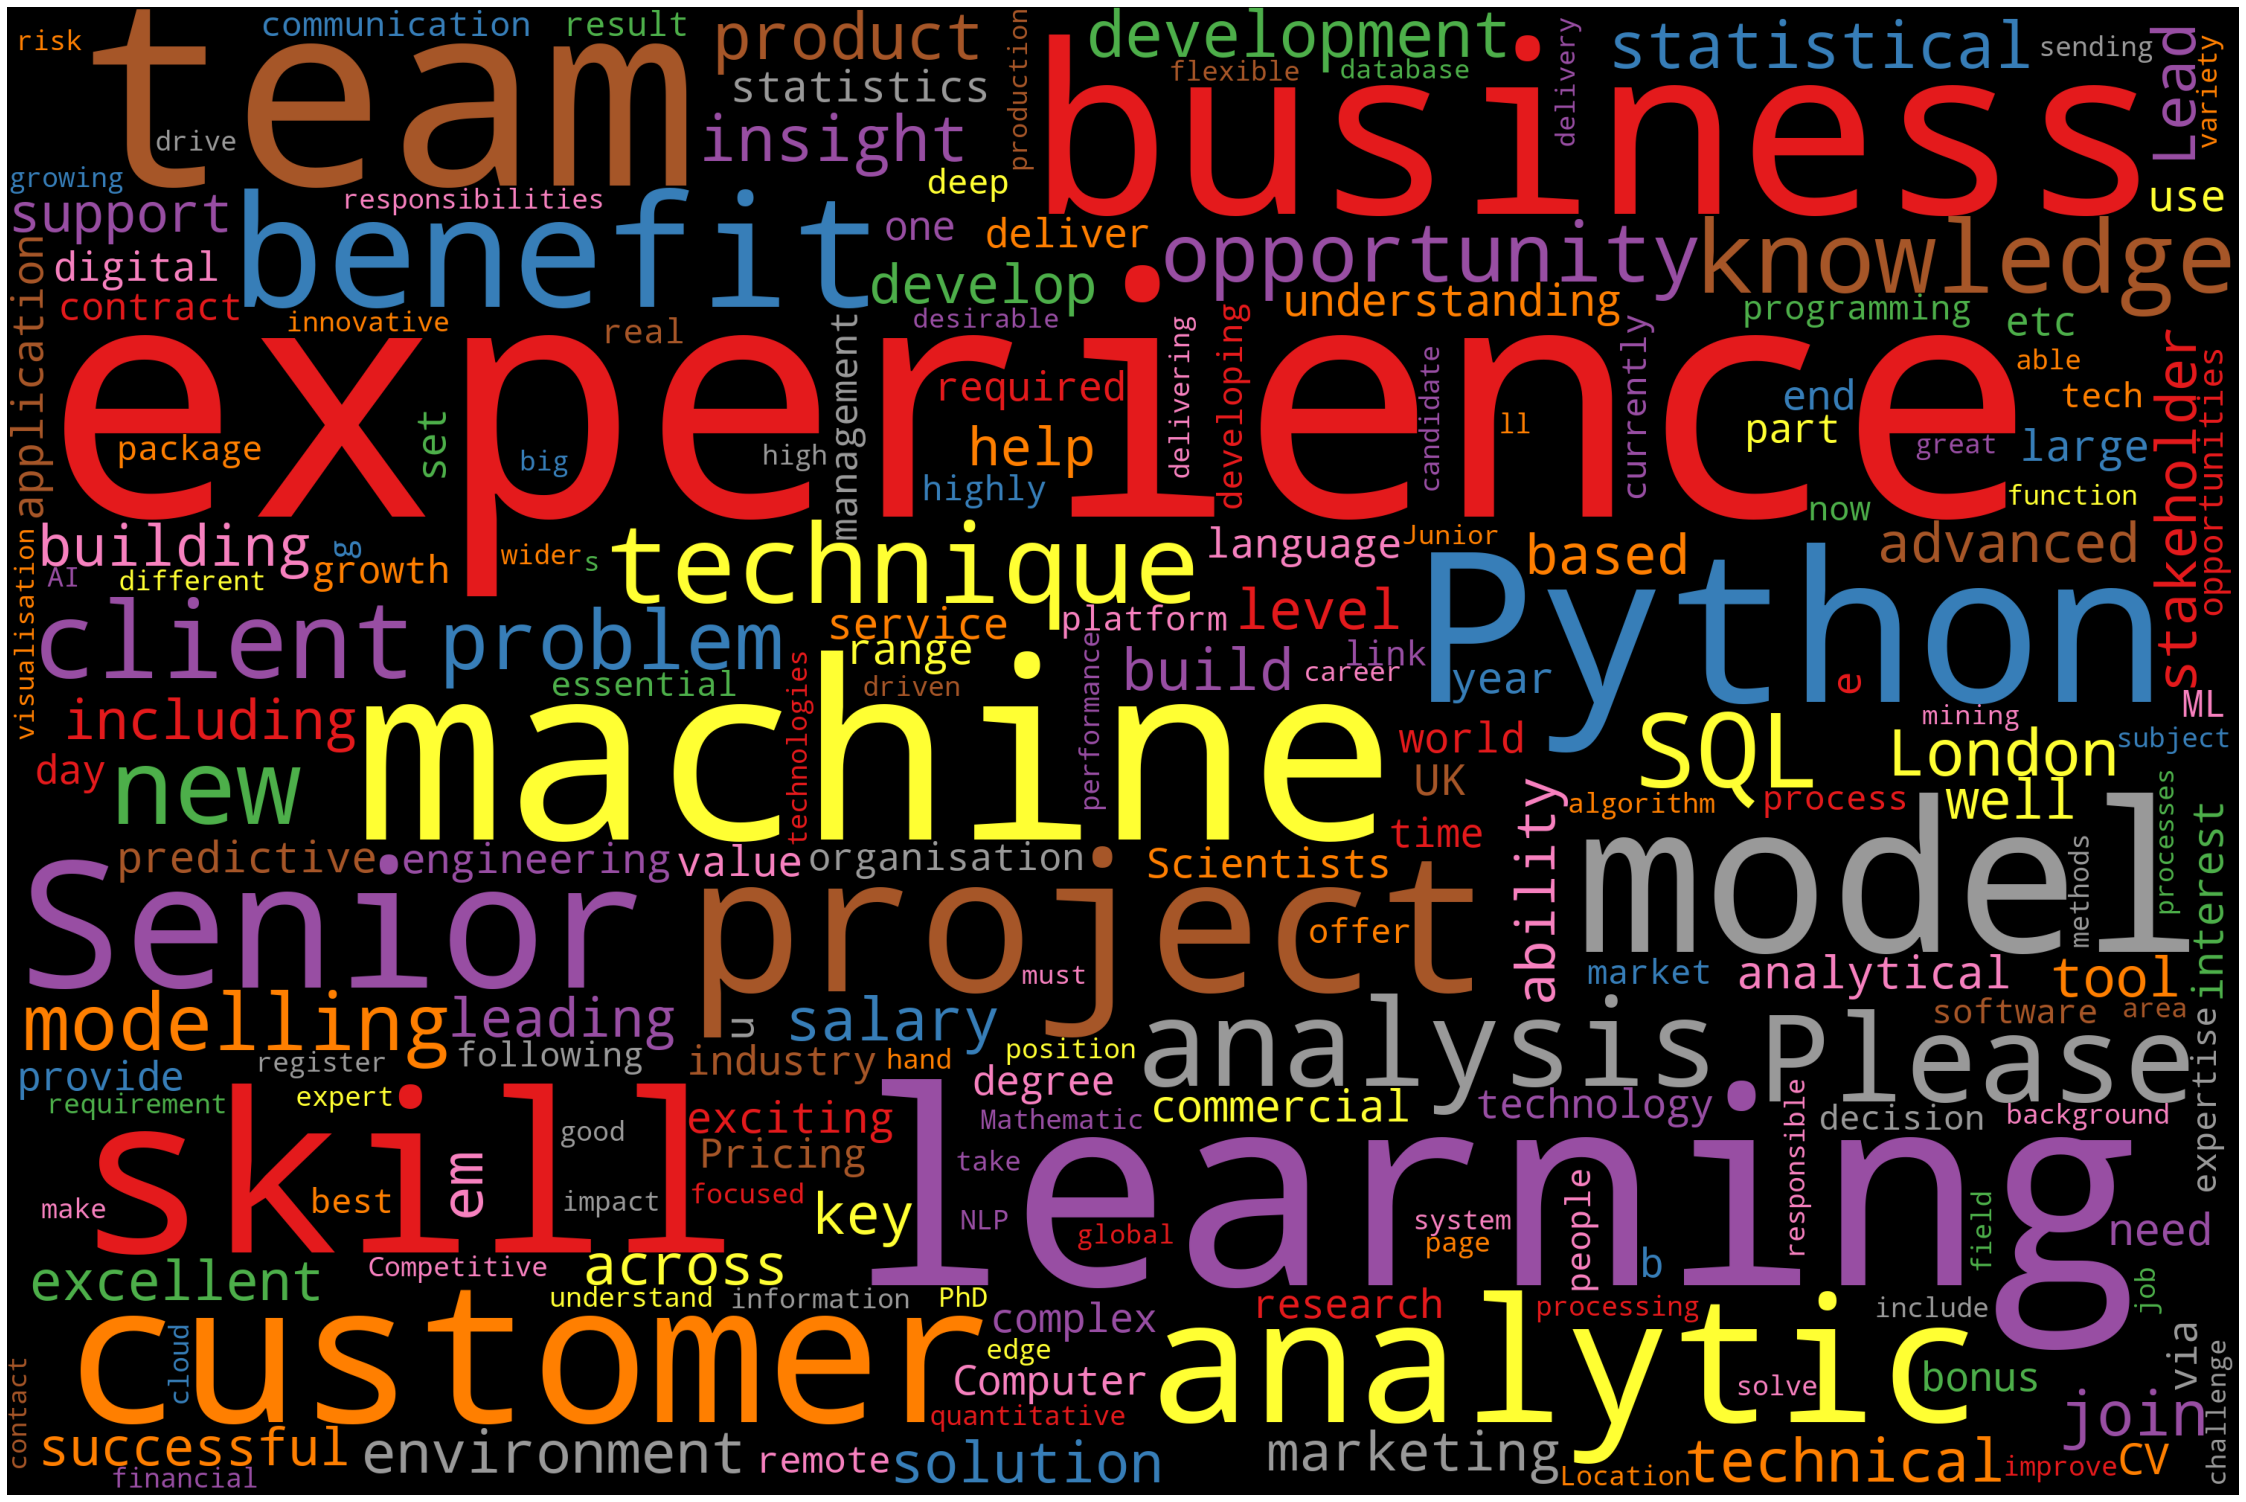

In [23]:
# Now let's analyse it individually
# Data Scientist

# Text
text_scientist = ' '.join(df[df['role']=='Data Scientist']['fullDescription'].tolist())

# Generate word cloud
wordcloud_scientist = WordCloud(width = 3000, height = 2000, random_state=1, 
                      background_color='black', colormap='Set1', collocations=False, 
                      stopwords = STOPWORDS, max_words=200).generate(text_scientist)

# Plot
plot_cloud(wordcloud_scientist)

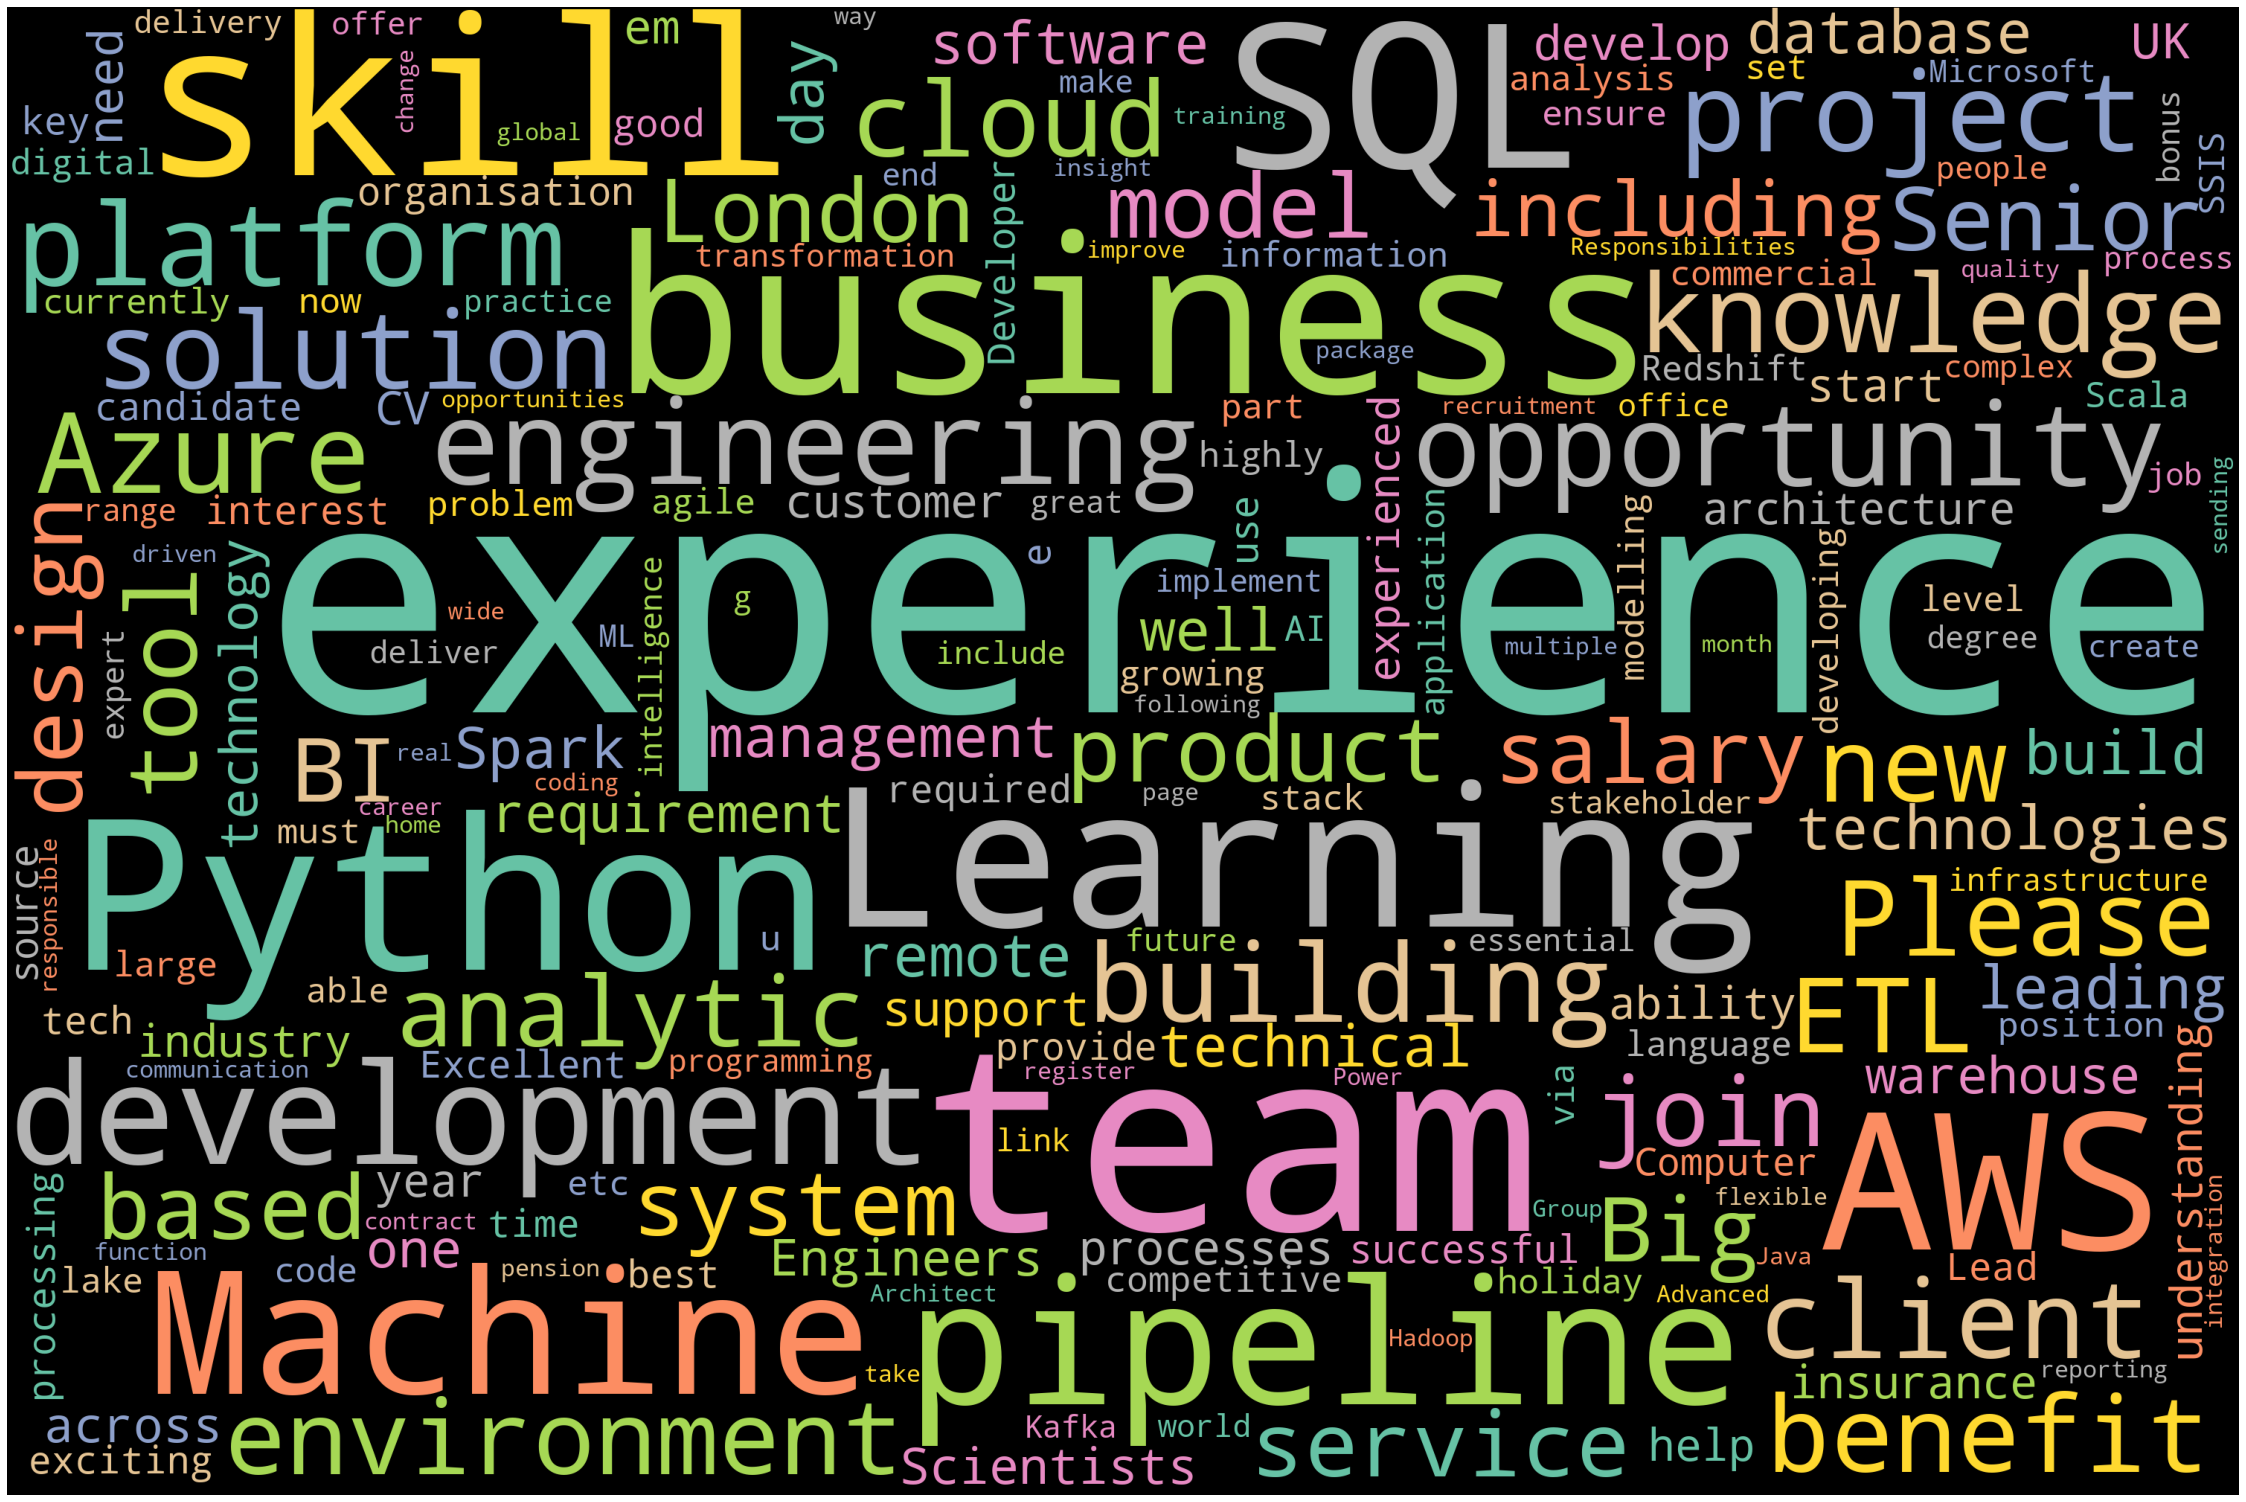

In [24]:
# Data Engineer

# Text
text_engineer = ' '.join(df[df['role']=='Data Engineer']['fullDescription'].tolist())

# Generate word cloud
wordcloud_engineer = WordCloud(width = 3000, height = 2000, random_state=1, 
                      background_color='black', colormap='Set2', collocations=False, 
                      stopwords = STOPWORDS, max_words=200).generate(text_engineer)

# Plot
plot_cloud(wordcloud_engineer)

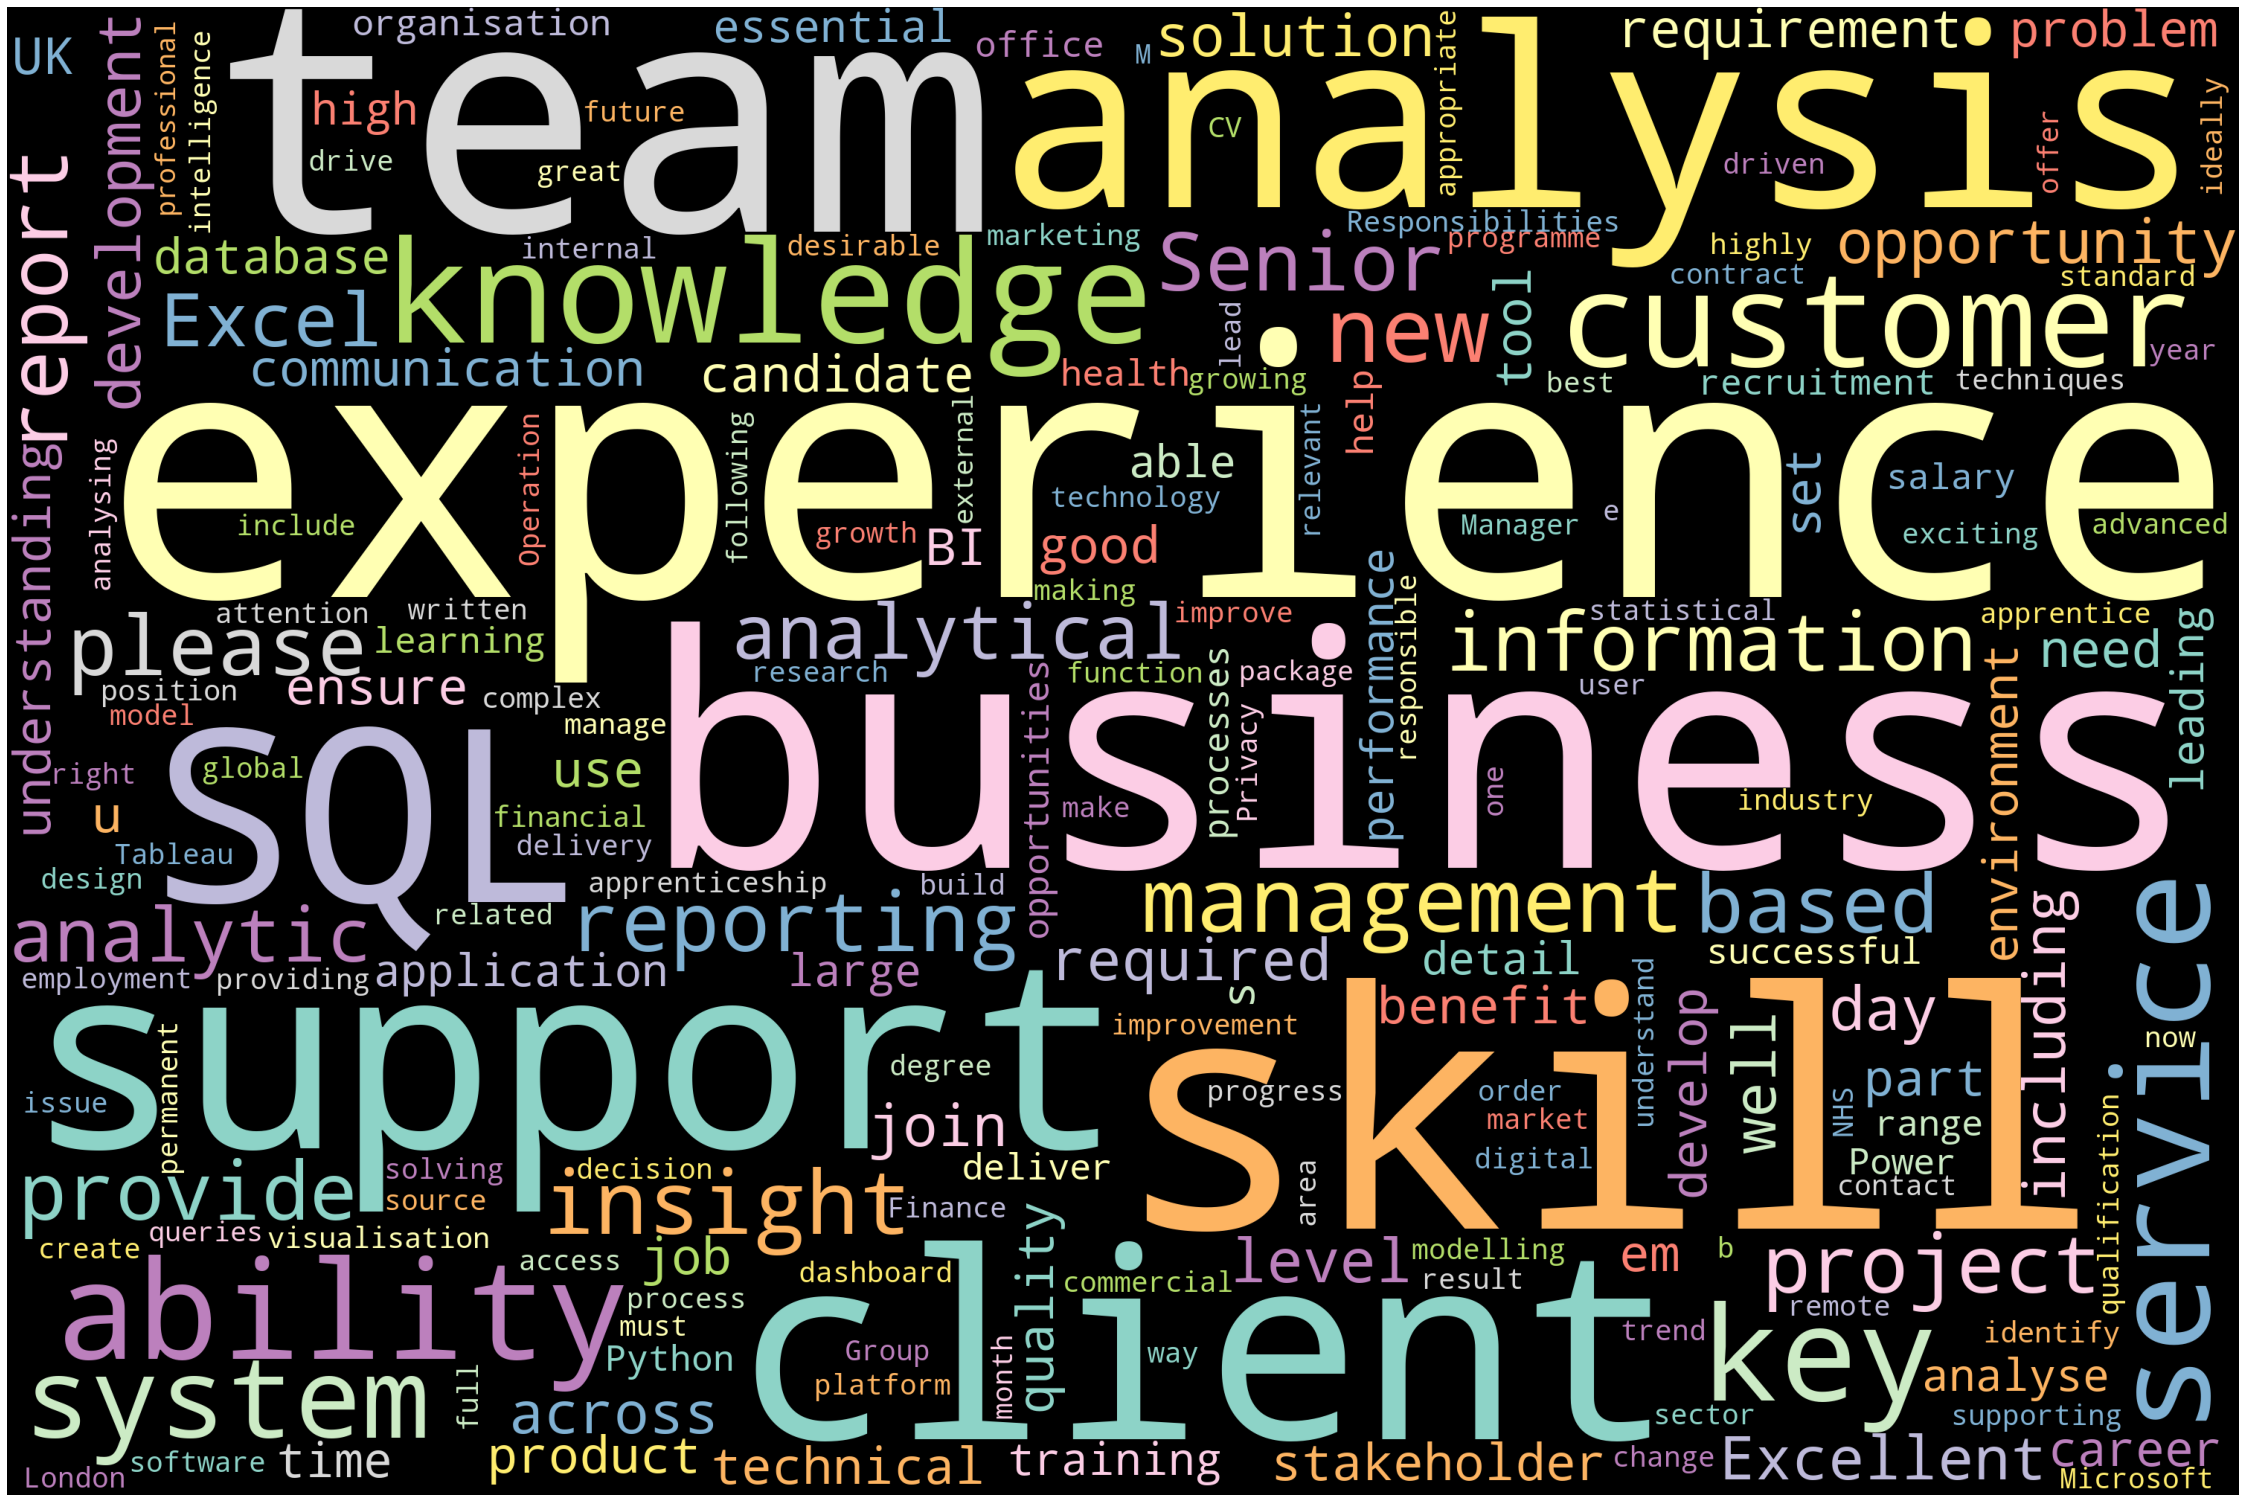

In [25]:
# Data Analyst

# Text
text_analyst = ' '.join(df[df['role']=='Data Analyst']['fullDescription'].tolist())

# Generate word cloud
wordcloud_analyst = WordCloud(width = 3000, height = 2000, random_state=1, 
                      background_color='black', colormap='Set3', collocations=False, 
                      stopwords = STOPWORDS, max_words=200).generate(text_analyst)

# Plot
plot_cloud(wordcloud_analyst)

From the word clouds above, we can assume the following:

1. It is expected a higher level of seniority from data scientists compared to data engineers and data analysts
2. SQL was the common hard skill between all the roles
3. Python seems to be a required skill for data science and data engineering positions, but not expected from data analysts
4. It is expected from data engineers to have knowledge/experience with cloud service providers such as AWS and Azure as well as with ETL/pipeline processes
5. A data analyst position seems to involve more support activities and a higher degree of business understanding and customer/client facing activities